<a href="https://colab.research.google.com/github/Sandy13283/Data_science/blob/main/Sale_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries **

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [43]:
sale=pd.read_csv('/content/drive/MyDrive/Data_set/Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv',encoding='unicode_escape')

In [44]:
sale.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [45]:
sale.shape

(11251, 15)

# Getting info about the csv file

In [46]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [47]:
test=[['Sandy',3],['Bhati',4],['Kavish',5],['Mehul',1],['Kritika']]
df_test=pd.DataFrame(test,columns=['Name','Roll no'])
df_test.sort_values(by=['Roll no'],ascending=True)
df_test.dropna(inplace=False)
df_test.head()

,Name,Roll no
0,Sandy,3.0
1,Bhati,4.0
2,Kavish,5.0
3,Mehul,1.0
4,Kritika,NaN


# **Data Cleaning**

In [48]:
sale=sale.drop(['Status','unnamed1'],axis=1)

In [49]:
sale.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# **Getting info about desired Columns**

In [50]:
sale[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **Exploratory Data analysis**

gender

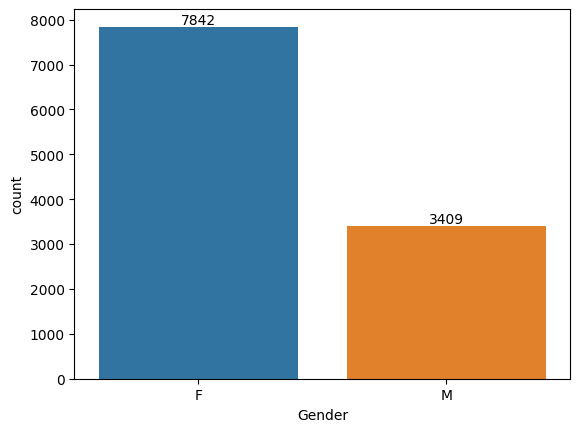

In [51]:
gx=sns.countplot(x='Gender',data=sale)
for bars in gx.containers:
  gx.bar_label(bars)

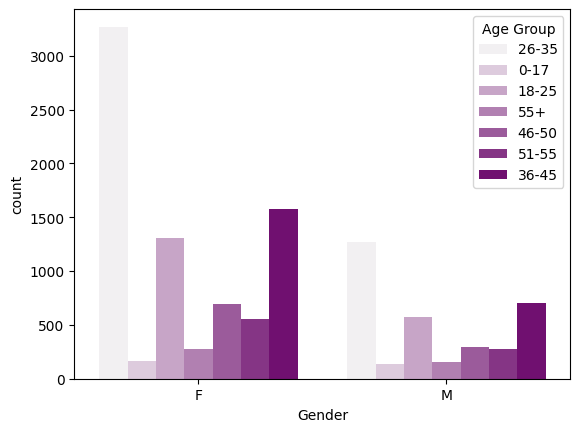

In [67]:
sns.countplot(x="Gender",hue='Age Group',data=sale,color='Purple')
plt.show()

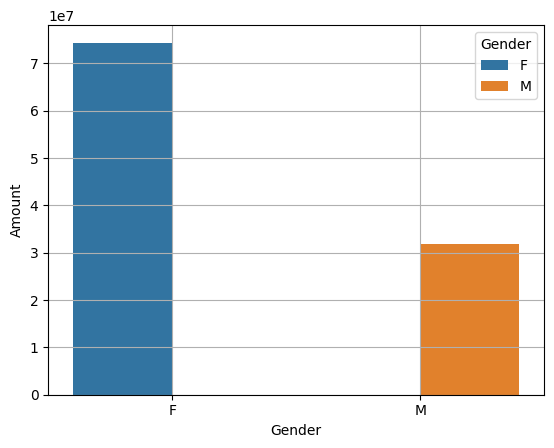

In [73]:
sale_gen=sale.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x='Gender',y='Amount',hue='Gender',data=sale_gen)
plt.grid(True)
plt.show()

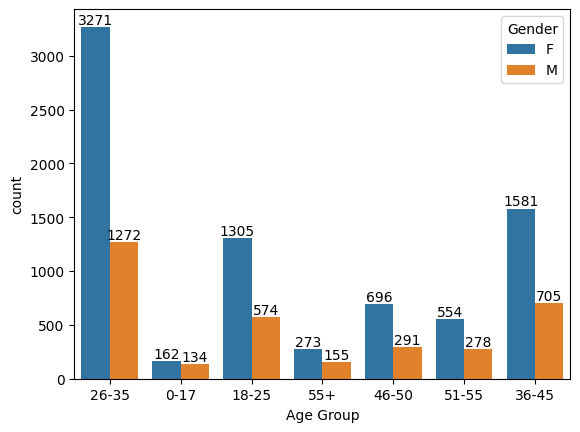

In [66]:
ax=sns.countplot(x='Age Group',hue='Gender',data=sale)
for bars in ax.containers:
  ax.bar_label(bars)

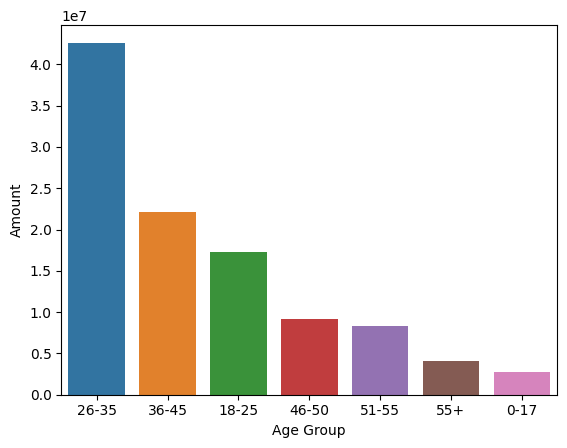

In [76]:
sale_age=sale.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x="Age Group",y='Amount',data=sale_age)
plt.show()

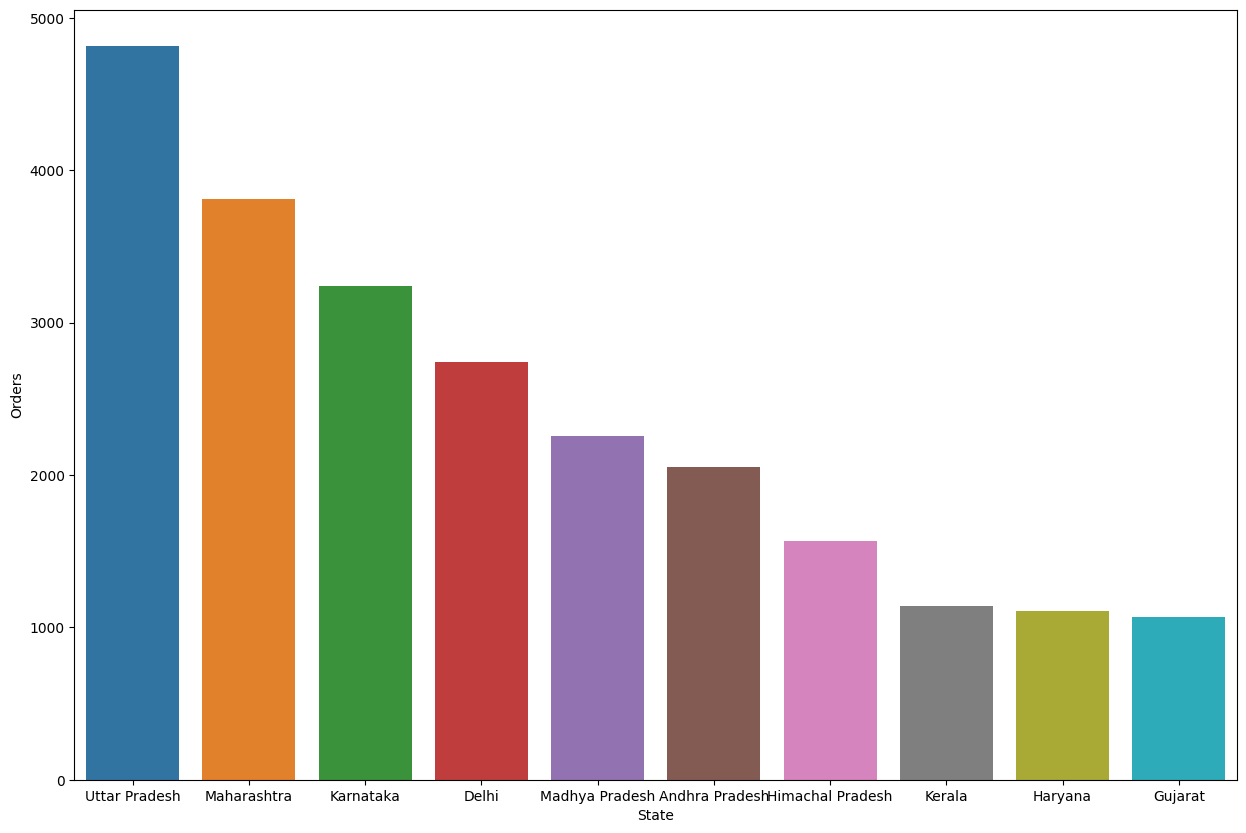

In [93]:
sale_state=sale.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='State',y='Orders',data=sale_state)
plt.show()